In [1]:
%matplotlib inline
import os
import glob
import pickle
import curlovision as cvis
import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from matplotlib.collections import PatchCollection
import numpy as np


/Users/jpdumm/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Loop over all videos in a dir, process, and save MatchResults
results = glob.glob('MatchResults/*.pkl')
match_results = []
for filename in results:
    print('Processing MatchResult: {}'.format(filename))
    with open(filename, 'r') as f:
        match_results.append(pickle.load(f))
        

Processing MatchResult: MatchResults/PyeongChang.Olympics.2018.curling.men's.bronze.medal.match.Switzerland.v.Canada.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: MatchResults/PyeongChang.Olympics.2018.curling.men's.gold.medal.match.Sweden.v.USA.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: MatchResults/PyeongChang.Olympics.2018.curling.men's.round-robin.Sweden.v.USA.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: MatchResults/PyeongChang.Olympics.2018.curling.women's.bronze.medal.match.Great.Britain.v.Japan.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: MatchResults/PyeongChang.Olympics.2018.curling.women's.gold.medal.match.Sweden.v.Korea.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: MatchResults/PyeongChang.Olympics.2018.curling.women's.round-robin.Canada.v.Sweden.1080p.NBC.WEB-DL-FINFUNGUS.mp4.pkl
Processing MatchResult: MatchResults/PyeongChang.Olympics.2018.curling.women's.round-robin.Denmark.v.Canada.1080p.NBC.WEB-DL-F

Results for End 2

Red Score: 1, Yellow Score: 0

Red left: 7, Yel left: 8
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		0.27		2.78




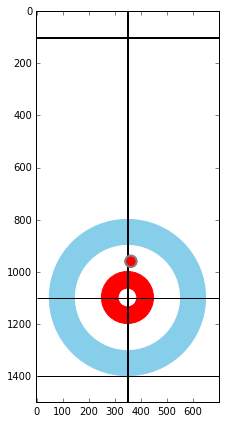

Red left: 6, Yel left: 7
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		0.23		3.02
				yellow 		3.63		7.48
				red    		0.54		11.71




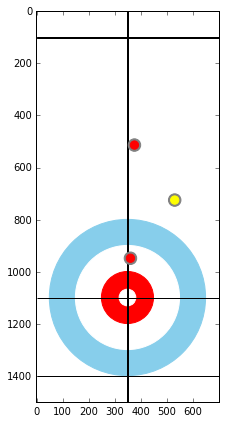

Red left: 6, Yel left: 6
  Stone positions             :	Color		X(ft)		Y(ft)
				yellow 		-0.06		3.88
				red    		2.31		-5.76
				yellow 		3.77		7.59
				red    		0.58		11.98




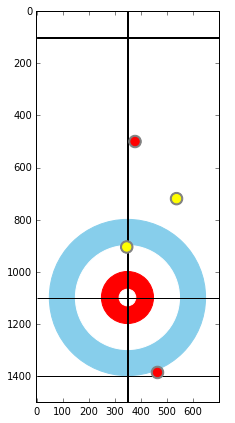

Red left: 5, Yel left: 6
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		-0.40		4.58
				yellow 		3.67		7.39
				red    		0.59		11.65




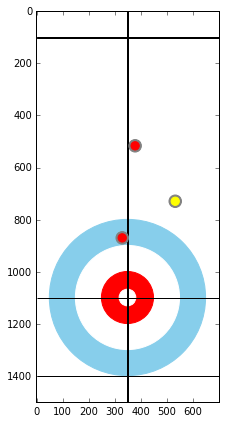

Red left: 5, Yel left: 5
  Stone positions             :	Color		X(ft)		Y(ft)
				yellow 		1.02		4.65
				yellow 		3.53		7.19
				red    		0.53		11.36




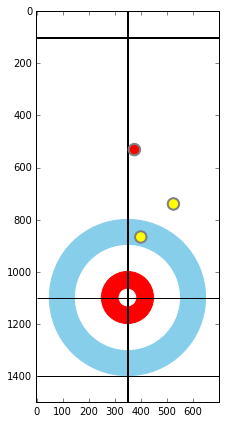

Red left: 4, Yel left: 5
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		3.73		3.83
				yellow 		3.73		7.67
				red    		0.57		12.07
				yellow 		-12.23		11.47




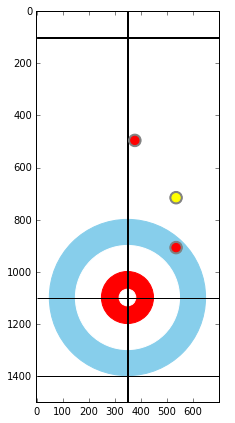

Red left: 4, Yel left: 4
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		3.66		3.72
				red    		0.54		11.77




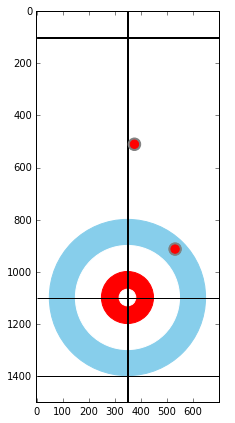

Red left: 3, Yel left: 4
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		0.14		0.63
				red    		3.69		3.69
				red    		0.57		11.71




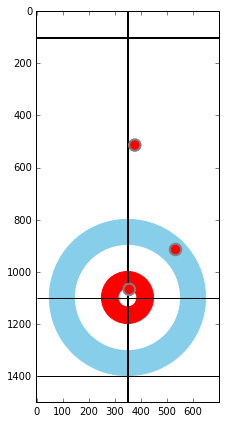

Red left: 3, Yel left: 3
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		0.11		0.64
				red    		3.56		3.64
				red    		0.08		7.44
				red    		1.42		10.89




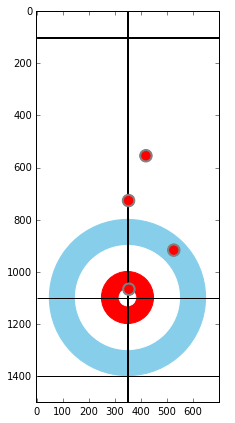

Red left: 2, Yel left: 3
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		0.05		0.62
				red    		3.46		3.51
				red    		0.05		7.18
				red    		1.34		10.50




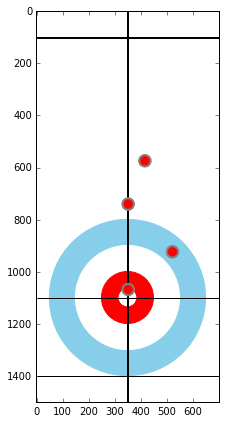

Red left: 2, Yel left: 2
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		0.12		0.66
				red    		3.75		3.81
				yellow 		3.62		7.00
				red    		1.50		11.38




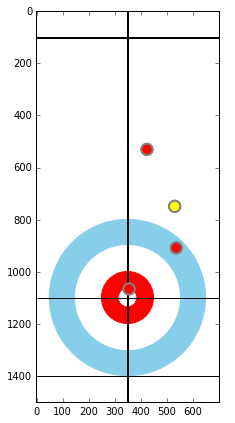

Red left: 1, Yel left: 2
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		0.07		0.61
				red    		3.61		3.65
				yellow 		3.55		6.67
				red    		0.04		8.32
				red    		1.43		10.96




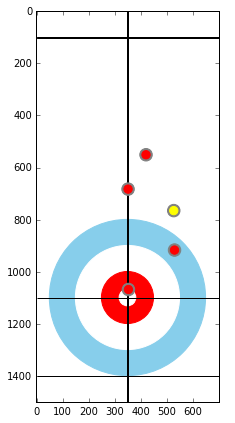

Red left: 1, Yel left: 1
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		3.68		3.72
				yellow 		3.72		6.82
				yellow 		0.42		9.20
				red    		1.50		11.25




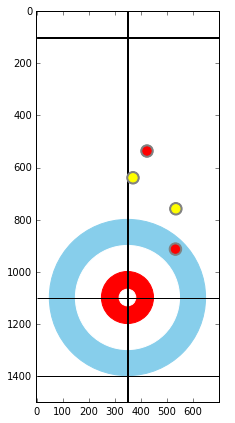

Red left: 0, Yel left: 1
  Stone positions             :	Color		X(ft)		Y(ft)
				red    		0.54		0.70
				red    		3.77		3.77
				yellow 		3.77		6.93
				yellow 		0.41		9.32
				red    		1.53		11.43




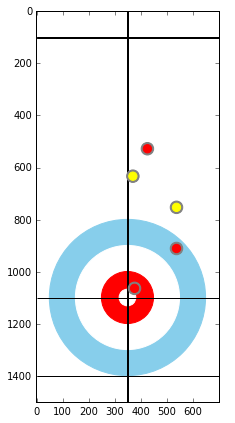

In [19]:
match_results[0].end_results[1].draw()

In [23]:
def heatmap_MR(match_results):
    xs = []
    ys = []
    for mr in match_results:
        for er in mr.end_results:
            for layout in er.stone_layouts:
                for stone in layout.stones:
                    xs.append(stone.x)
                    ys.append(stone.y)
    return xs,ys
        
xs,ys = heatmap_MR(match_results)

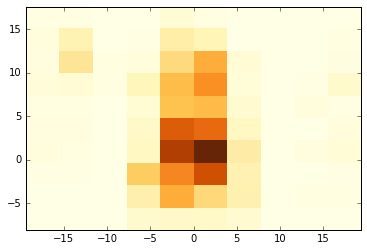

In [24]:
plt.figure()
plt.hist2d(xs,ys,cmap='YlOrBr')
plt.show()

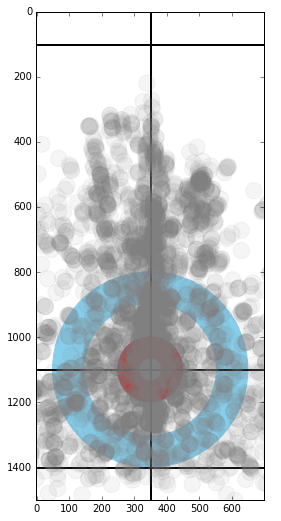

In [25]:
        h=1500 # height represents 30 ft in real world, everything scales to this
        w=int(h*14./30.)  # width represents 14 ft in the read world
        ft2px = h/30.

        patches = []
        # Draw House + lines
        xc = int(w/2.)-1
        yc = int(h*22./30.)-1
        r12 = int(w*12./14./2.)
        r8 = int(r12*8./12.)
        r4 = int(r12*4./12.)
        rb = int(r12*1.3/12.)
        patches.append(Circle((xc, yc), r12 ,color='skyblue'))
        patches.append(Circle((xc, yc), r8 ,color='white'))
        patches.append(Circle((xc, yc), r4 ,color='red'))
        patches.append(Circle((xc, yc), rb ,color='white'))

        tl = Rectangle((0,yc),w,1,color='black')
        patches.append(tl)
        bl = Rectangle((0,int(h-h*2./30.)),w,1,color='black')
        patches.append(bl)
        hl = Rectangle((0,100),w,1,color='black')
        patches.append(hl)
        cl = Rectangle((xc,0),1,h,color='black')
        patches.append(cl)

        # Draw Stones
        for x,y in zip(xs,ys):
            #print(stone)
            patches.append(Circle((xc+x*ft2px, yc-y*ft2px), 0.5*ft2px ,color='grey',alpha=0.08))

        # Display everything
        fig = plt.figure(figsize=(h/80.,w/80.))
        img = np.ones((h,w,3),dtype=int)
        plt.imshow(img)
        for patch in patches:
            fig.gca().add_patch(patch)
        plt.show()


In [ ]:
match_results[1].end_results[6].draw()

In [ ]:
match_results[1].name